#### Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load the dataset


In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

#### Perform exploratory data analysis


<AxesSubplot: ylabel='count'>

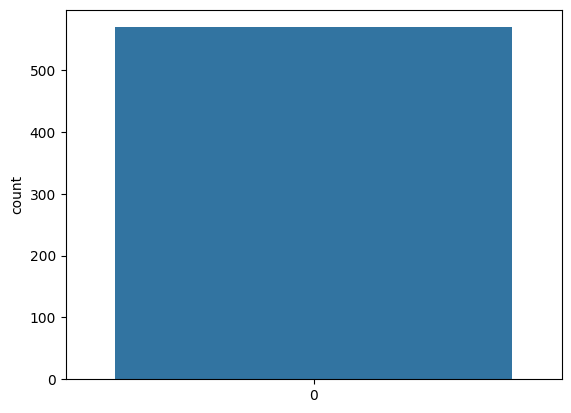

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
df['diagnosis'] = y
sns.countplot(df['diagnosis'])


#### Preprocess the data


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Train a machine learning model


In [5]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

#### Evaluate the performance of the model


In [6]:
y_pred = svc.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy score: 0.9736842105263158
Confusion matrix:
[[41  2]
 [ 1 70]]
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Tune the hyperparameters of the model


In [7]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.9758241758241759


#### Test the final model on the testing set


In [8]:
final_model = SVC(C=1, kernel='linear', gamma='scale')
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred_final)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred_final)}")
print(f"Classification report:\n{classification_report(y_test, y_pred_final)}")

Accuracy score: 0.956140350877193
Confusion matrix:
[[41  2]
 [ 3 68]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Create confusion matrix heatmap


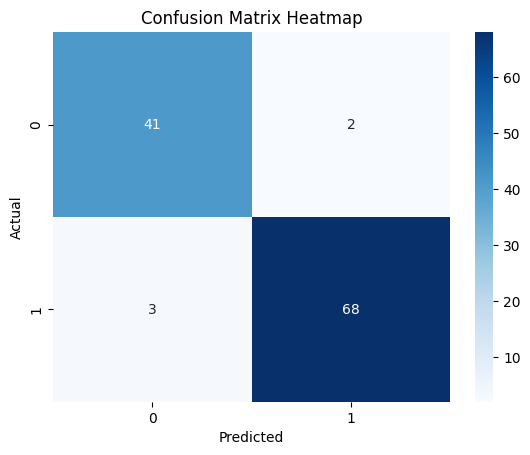

In [9]:
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()



#### Create convergence plot


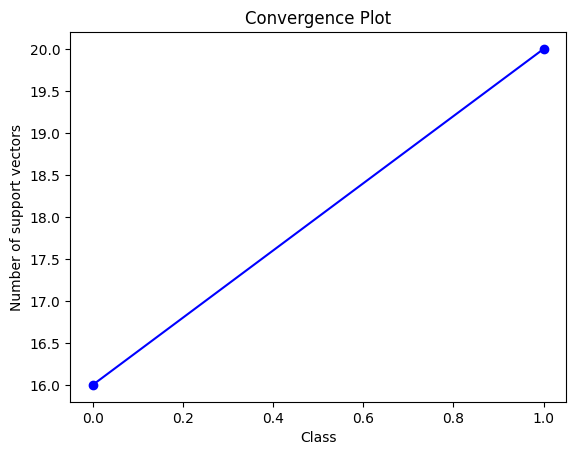

In [10]:
plt.plot(final_model.n_support_, 'bo-')
plt.xlabel('Class')
plt.ylabel('Number of support vectors')
plt.title('Convergence Plot')
plt.show()